# Project 2
## TMA4215 - Numerical Mathematics 

*Candidate numbers:*
10027
10066
10080

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb     # For computing the binomial coefficient
plt.rcParams["figure.figsize"] = (10,10)

### Task 1. Properties of Bernstein polynomial

#### a)

The $\textit{n}$th degree Bernstein polynomials are defined as: 
$$
B_{i, n}(t):=\binom{n}{i}t^i(1-t)^{n-i}, \quad i = 0, 1, ..., n \quad
$$


We know that the binomial coefficient is non-negative, i.e. $\binom{n}{i} \geq 0$. Also, since $t \in [0, 1],\; t^i \geq 0$ and $(1-t)^{n-i} \geq 0.$ Thus, since all parts of $B_{i,n}(t)$ is non-negative, so is $B_{i,n}(t)$. $\square$

#### b)
We want to show that the Bernstein polynomials can be recursively defined (for $1 < i < n$) as
$$
B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)
$$

The binomial coefficient can be expressed, by [Pascal's rule], as

$$
\binom{n}{i} = \binom{n-1}{i-1} + \binom{n-1}{i} \quad (1)
$$
Thus
$$
(1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t) = (1-t)\binom{n-1}{i}t^{i}(1-t)^{n-1-i} + t\binom{n-1}{i-1}t^{i-1}(1-t)^{n-1-(i-1)}
$$
$$
=\binom{n-1}{i}t^{i}(1-t)^{n-i} + \binom{n-1}{i-1}t^{i}(1-t)^{n-i}
$$
$$
=\left(\binom{n-1}{i} + \binom{n-1}{i-1}\right)t^{i}(1-t)^{n-i} = \binom{n}{i}t^{i}(1-t)^{n-i} = B_{i, n}(t).
$$

Which proves our statement, as we have equality in every step.



For $i = 0$ and $i = n$:
By using the definition of the Bernstein polynomials, we get

$$
B_{0,n} = \binom{n}{0} t^0 (1-t)^{n-0 } = (1-t)^n
$$
$$
B_{n,n} = \binom{n}{n} t^n (1-t)^{n-n } = t^n
$$


[Pascal's rule]: https://en.wikipedia.org/wiki/Pascal%27s_rule

#### c) 

We will show that $B_{i,n}(t)$ form a partition of unity, i.e.
$$
\sum_{i=0}^n B_{i,n}(t)=1
$$
First we check if it holds for the initial case, i.e. $n=0$:

$$
\overset{0}{\underset{i = 0}\sum} B_{i,0}(t) = B_{0,0}(t) = (1-t)^0 = 1,
$$
since $B_{0,n} = (1-t)^n$, by the previous task. 
 
Furthermore, we assume that our statement holds for $n$, i.e. $\overset{n}{\underset{i=0}\sum}{B_{i,n}(t)} = 1$.

To prove our statement, we have to show that it holds for $n+1$:


$$
\sum_{i=0}^{n+1}{B_{i,n+1}(t)} = B_{0,n+1}(t) + B_{n+1,n+1}(t) + \sum_{i=1}^{n}{B_{i,n+1}(t)}
$$


$$
\overset{\text{from 1b)}}{=} (1-t) B_{0,n}(t) + t B_{n,n}(t) + \sum_{i=1}^{n}{(1-t) B_{i,n}(t) + \sum_{i=1}^{n} t B_{i-1,n}(t)}
$$

$$
= \sum_{i=0}^{n}{(1-t) B_{i,n}(t) + \sum_{i=0}^{n} t B_{i,n}(t)}
$$

$$
= (1-t) \sum_{i=0}^{n}{ B_{i,n}(t) + t \sum_{i=0}^{n} B_{i,n}(t)}
$$

$$
= (1-t) + t = 1,
$$

where we have used the recursive property of the Bernstein polynomials and the expressions for $B_{0,n}(t)$ and $B_{n,n}(t)$ from 1b).

The change in summation from $i=1$ to $i=0$ arises because $(1-t) B_{0,n}(t)$ is added the first sum and $t B_{n,n}(t)$ is added to the second sum. Additionally, we also used the inductive assumption $\overset{n}{\underset{i=0}\sum}B_{i,n}(t) = 1$.

Thus, we have proven that the partition of unity holds for $n = 0$ and $n+1$, when it holds for $n$, concluding the induction.
$\square$

#### d)

By rearranging (1) we obtain:

$$
\binom{n}{i} - \binom{n-1}{i-1} = \binom{n-1}{i} \quad (2)
$$

Then by computing the derivative of $B_{i, n}(t)$ we get:

$$
B'_{i,n}(t) = \frac{d}{dt}\left(\binom{n}{i}t^i(1-t)^{n-i}\right) = \binom{n}{i}(i\cdot t^{i-1}(1-t)^{n-i} - (n-i)t^{i}(1-t)^{n-1-i})
$$

$$
=\binom{n}{i-1}t^{i-1}(1-t)^{n-i} - \left(n\binom{n}{i} - i\binom{n}{i} \right)t^{i}(1-t)^{n-1-i}
$$

$$
= n\binom{n-1}{i-1}t^{i-1}(1-t)^{n-i} - \left(n\binom{n}{i} - n\binom{n-1}{i-1} \right)t^{i}(1-t)^{n-1-i}
$$

Where we see that the first term is $nB_{i-1,n-1}(t)$, and by using (2), the second term becomes

$$
\left(n\binom{n}{i} - n\binom{n-1}{i-1} \right)t^{i}(1-t)^{n-1-i} = n\binom{n-1}{i}t^{i}(1-t)^{n-1-i} = nB_{i, n-1}(t)
$$

Combining these two, we get the result 

$$
B'_{i,n}(t) = n(B_{i-1, n-1}(t) - B_{i,n-1}(t))\quad\square
$$

where $B_{-1, n-1} \equiv B_{n,n-1} \equiv 0$.

#### e)

Below, the function **Bernstein** is implemented, which evaluates $B_{i,n}$ at $t$. The $B_{i,n}$'s are then plotted for $i = 0,\dots, n $, and for $n=4,5,15$.

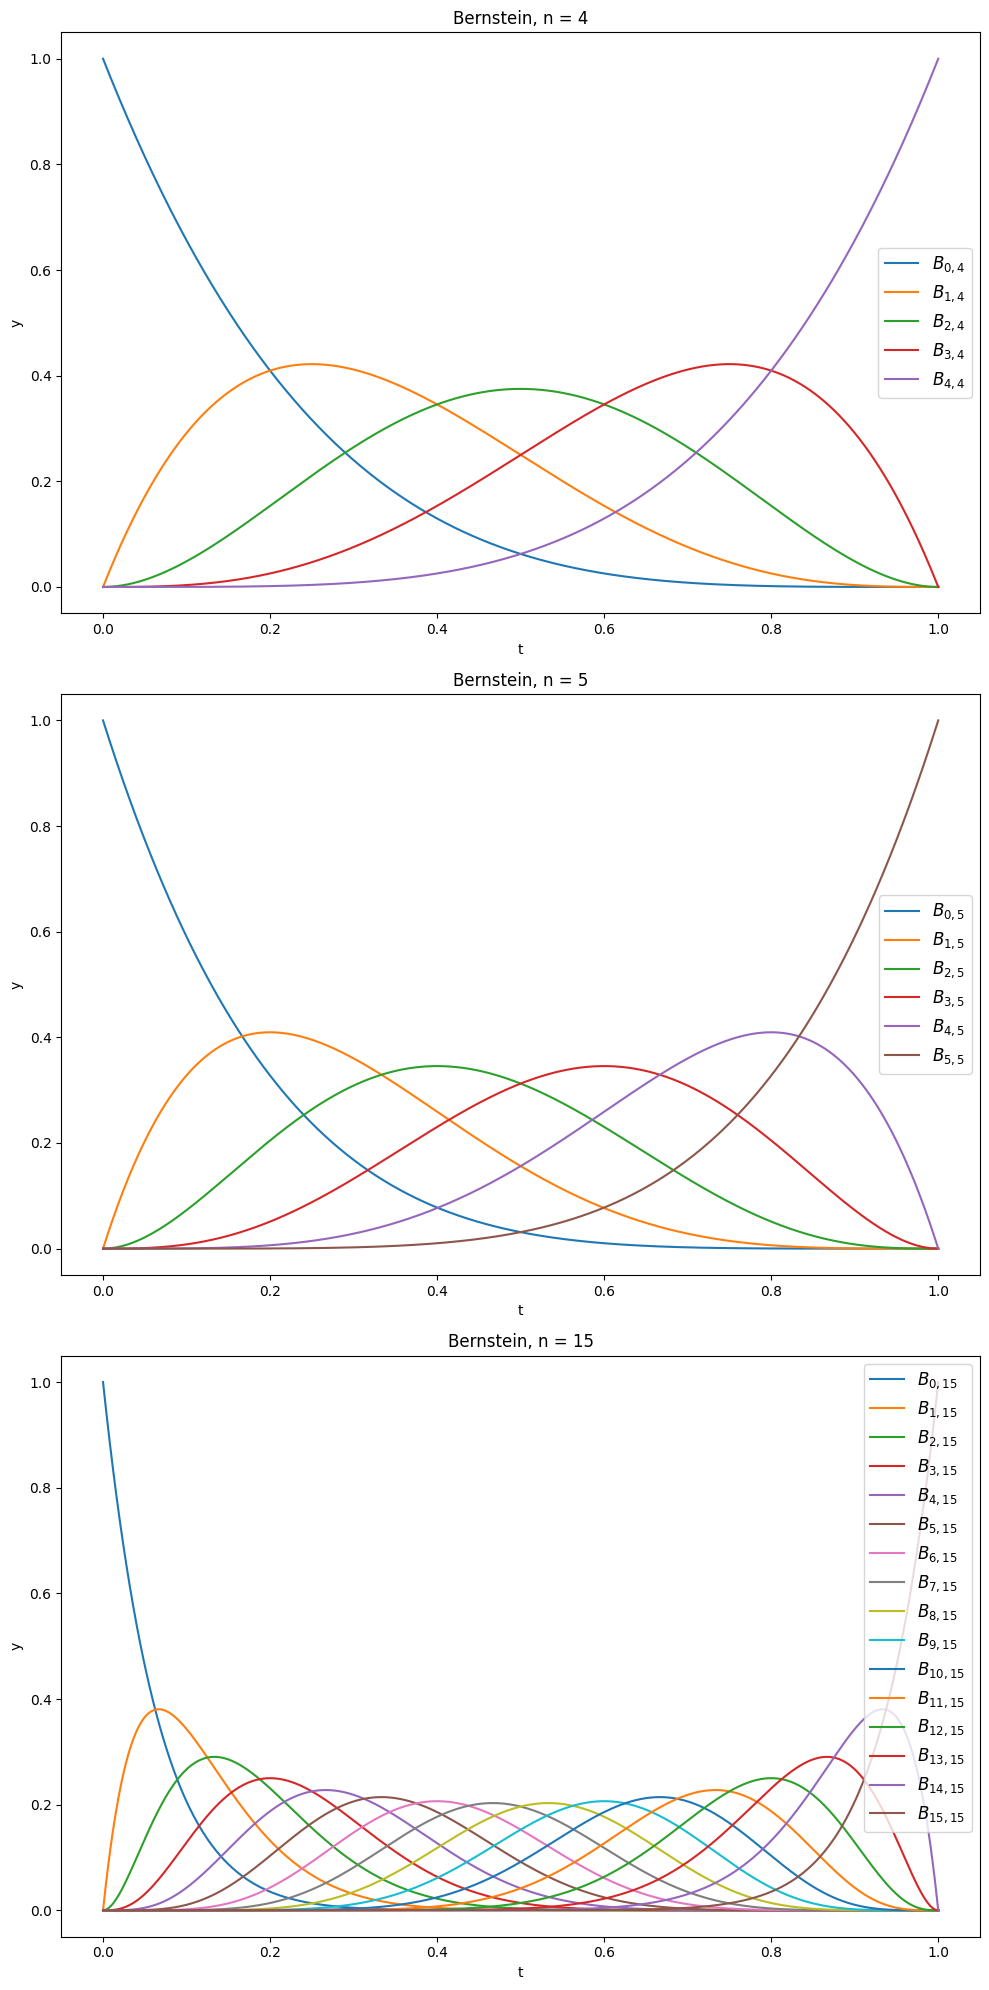

In [ ]:
def Bernstein(i,n,t):
    '''Evaluates the Bernstein polynomial.'''
    return comb(n,i) * t**i * (1-t)**(n-i)

# List of n-values
n_list = [4,5,15]

# Number of time steps
N = 1000
t = np.linspace(0,1,N)

# Plot the Bernstein polyomials for different n-values
plt.figure(figsize=(10, 20))     
for idx, n in enumerate(n_list, 1):   # starting index from 1 to make it easier to use in plotting
    plt.subplot(len(n_list),1,idx)
    plt.title(f"Bernstein, n = {n}")
    plt.xlabel("t")
    plt.ylabel("y")

    for i in range(n+1):
        B = Bernstein(i, n, t)
        plt.plot(t,B, label = f"$B_{{{i},{n}}}$")
        plt.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()

We observe that the Bernstein functions are symmetric about the midpoint $t=0.5$. The functions $B_{i,n}$ and $B_{n-i,n}$ are mirror images of each other. The function $B_{0,n}$ starts at 1, and $B_{n,n}$ ends at 1 which corresponds to our earlier calculation.

All other funtions start and end at 0. The maximum value of each function shifts to the right as $i$ increases. The peaks between neighboring functions also becomes tighter as $n$ increases. Furthermore, there is a significant overlap between neighboring functions. 

### Task 2. Properties of (composite) Bézier curves

#### a)

The $\textit{n}$th degree Bézier curve is defined as
$$
\mathbf{c}(t) = \overset{n}{\underset{i=0} \sum}B_{i,n}(t)\mathbf{p}_i
$$

By using our result from 1d) we obtain

$$
\mathbf{c}'(t) = \frac{d}{dt}\overset{n}{\underset{i=0} \sum}B_{i,n}(t)\mathbf{p}_i = \overset{n}{\underset{i=0} \sum}B'_{i,n}(t)\mathbf{p}_i = n\overset{n}{\underset{i=0} \sum}(B_{i-1,n-1}(t) -B_{i,n-1}(t)) \mathbf{p}_i, 
$$
where $B_{-1, n-1} \equiv B_{n, n-1} \equiv 0$, thus,
$$
\mathbf{c}'(t) = n \overset{n}{\underset{i=0} \sum}B_{i-1,n-1}(t)\mathbf{p}_i - n\overset{n}{\underset{i=0} \sum}B_{i,n-1}(t) \mathbf{p}_i = n \overset{n}{\underset{i=1} \sum}B_{i-1,n-1}(t)\mathbf{p}_i - n\overset{n-1}{\underset{i=0} \sum}B_{i,n-1}(t) \mathbf{p}_i
$$

$$
= n \overset{n-1}{\underset{i=0} \sum}B_{i,n-1}(t)\mathbf{p}_{i+1} - n\overset{n-1}{\underset{i=0} \sum}B_{i,n-1}(t) \mathbf{p}_i = n \overset{n-1}{\underset{i=0} \sum}B_{i,n-1}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i),
$$
where we have simplified the expression to be dependent on only one Bernstein polynomial.

Similarly for $\mathbf{c}''(t)$, by using 1d (but for $B_{i,n-1}'(t)$), we obtain:

$$
\mathbf{c}''(t) = \frac{d}{dt}\mathbf{c}'(t) = n \overset{n-1}{\underset{i=0} \sum}B_{i,n-1}'(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)
$$

$$
= n \overset{n-1}{\underset{i=0} \sum}(n-1)(B_{i-1,n-2}(t) - B_{i,n-2}(t))(\mathbf{p}_{i+1} - \mathbf{p}_i) 
$$

$$
= n(n-1) \left(\overset{n-1}{\underset{i=0} \sum}B_{i-1,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) - \overset{n-1}{\underset{i=0} \sum}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) \right)
$$

Again we can see that some of the Bernstein polynomials are zero

$$
= n(n-1) \left(\overset{n-1}{\underset{i=1} \sum}B_{i-1,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) - \overset{n-2}{\underset{i=0} \sum}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) \right)
$$

$$
= n(n-1) \left(\overset{n-2}{\underset{i=0} \sum}B_{i,n-2}(t)(\mathbf{p}_{i+2} - \mathbf{p}_{i+1}) - \overset{n-2}{\underset{i=0} \sum}B_{i,n-2}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i) \right)
$$

$$
\Rightarrow \mathbf{c}''(t) = n(n-1) \overset{n-2}{\underset{i=0} \sum}B_{i,n-2}(t)(\mathbf{p}_{i} - 2\mathbf{p}_{i+1} + \mathbf{p}_{i+2})
$$


#### b)

By evaluating $\mathbf{c}(t)$ at $t=0$ and $t=1$ we get
$$ 
\mathbf{c}(0) = \sum_{i=0}^{n} B_{i,n}(0) \mathbf{p}_i = \sum_{i=0}^{n}\binom{n}{i}0^i(1-0)^{n-i}\mathbf{p}_i = \mathbf{p}_0
$$
and
$$ 
\mathbf{c}(1) = \sum_{i=0}^{n} B_{i,n}(1) \mathbf{p}_i = \sum_{i=0}^{n}\binom{n}{i}1^i(1-1)^{n-i}\mathbf{p}_i = \mathbf{p}_n,
$$

where we have used that $0^0 = 1$.

This result tells us that the Bézier curve $c(t)$ will interpolate the first and last control point. That is, we know that the curve will start at the control point $\mathbf{p}_0$ at $t=0$, and it will end at the control point $\mathbf{p}_n$ at $t=1$. This is an important property for Bézier curves, as this will make sure that the curve is "anchored" at the first and last control points.

#### c)

##### 1.

From earlier we have that

$$
\mathbf{c}'(t) = n \overset{n-1}{\underset{i=0} \sum}B_{i,n-1}(t)(\mathbf{p}_{i+1} - \mathbf{p}_i)
$$

Where the Bernstein polynomial is

$$
B_{i, n-1}(t) = \binom{n-1}{i}t^{i}(1-t)^{n-1-i} 
$$

If we evaluate $\mathbf{c}'(t)$ at $t = 0$, we can see that the $B$'s will be zero for all $i$, except for when we obtain $0^0$, i.e. for $i = 0$, where

$$
B_{0,n-1}(0) = \binom{n-1}{0}0^0(1-0)^{n-1} = 1
$$

Thus:
$$
\mathbf{c}'(0) = n(\mathbf{p}_{1}-\mathbf{p}_0)
$$



##### 2.

Similarly, for the case of $t = 1$:

The Bernstein polynomials will all tend to zero for all $i$, except for when $(1-t)^{n-1-i}\big|_{t=1} = 0^0$, i.e. only for $i =n-1$, where

$$
B_{n-1,n-1}(1) = \binom{n-1}{n-1}1^{n-1}(1-1)^{0} = 1
$$

Thus:
$$
\mathbf{c}'(1) = n(\mathbf{p}_n - \mathbf{p}_{n-1})
$$


##### 3. 

We then do the same for $\mathbf{c}''(t) = n(n-1)\overset{n-2}{\underset{i=0}\sum}B_{i,n-2}(\mathbf{p}_{i+2} -2\mathbf{p}_{i+1} + \mathbf{p}_{i})$

For $t=0$, the only non-zero part of the sum is, again, when we get $0^0$, which is for $i = 0$. And we know that $B_{0,n-2}(0)=B_{0, n-1}(0) = 1$, thus:

$$
\mathbf{c}''(0) = n(n-1)(\mathbf{p}_{0}-2\mathbf{p}_{1}+\mathbf{p}_{2})
$$

##### 4.

For $t=1$, we can see that the only non-zero part of the sum is for $i = n-2$, and the corresponding Bernstein polynomial $B_{n-2, n-2}(1) = 1$. Thus:

$$
\mathbf{c}''(1) = n(n-1)(\mathbf{p}_{n}-2\mathbf{p}_{n-1}+\mathbf{p}_{n-2})
$$

QED

**Interpolation properties at the end points**

One can specify for instance the velocity and acceleration, which will change the curve only between the end points

**What does changing $\mathbf{p}_1$ change?**

For $n \ge 4$:
We can see from the derivates above, that changing $\mathbf{p}_1$ changes the initial velocity, as $\mathbf{c}'(0)$ is dependent on $\mathbf{p}_1$.
Similarily, it also changes the initial acceleration of the curve, $\mathbf{c}''(0)$.

For $n=3$:
The observations when $n \ge 4$ are still valid. In addition, we can now see that the acceleration at the end point, $t = 1$, is dependent on $\mathbf{p}_1$. I.e. changing $\mathbf{p}_1$ also changes the end point acceleration.

For $n = 2$:
The observations when $n=3$ are still valid, but in addition the velocity at the end point will change. 



#### d)

The recursive property of the Bernstein polynomials can be used to express the Bézier curve in a similar way, which we want to prove.

$$
\mathbf{b}_n(t;\mathbf{p}_0, ..., \mathbf{p}_n) = \overset{n}{\underset{i=0} \sum}B_{i,n}(t)\mathbf{p}_i = \overset{n}{\underset{i=0} \sum}((1-t)B_{i,n-1}(t)+tB_{i-1,n-1}(t))\mathbf{p}_i
$$

$$
= \overset{n}{\underset{i=0} \sum}(1-t)B_{i,n-1}(t)\mathbf{p}_i +\overset{n}{\underset{i=0} \sum} tB_{i-1,n-1}(t)\mathbf{p}_i = \overset{n-1}{\underset{i=0} \sum}(1-t)B_{i,n-1}(t)\mathbf{p}_i +\overset{n}{\underset{i=1} \sum} tB_{i-1,n-1}(t)\mathbf{p}_i
$$

Where the change in summation indices comes from $B_{i,n-1}(t)\big|_{i=n} = B_{i-1,n-1}(t)\big|_{i=0} \equiv 0$.

Thus, we see that

$$
\overset{n-1}{\underset{i=0} \sum}(1-t)B_{i,n-1}(t)\mathbf{p}_i +\overset{n}{\underset{i=1} \sum} tB_{i-1,n-1}(t)\mathbf{p}_i= (1-t)\mathbf{b}_{n-1}(t;\mathbf{p}_0, ..., \mathbf{p}_{n-1}) + t\mathbf{b}_{n-1}(t;\mathbf{p}_1, ..., \mathbf{p}_n) \quad \square
$$

We will further use this result in the de Casteljau's algorithm.



#### e)

Below is an implementation of the de Casteljau's algorithm, which will evaluate a Bézier curve at a given point $t_0$. The function will not only provide the curve's value at $t_0$, but also output intermediate points across different levels. Using provided data points, we will then visualize the curve and connect the intermediate points with lines for each level.

In [ ]:
def de_casteljau(P, t):
    '''
    Performs de Casteljau's algorithm
    Parameters:
        
        Input
            P:     Initial points
            t:     t-value to evaluate the Bezier curve
        
        Output
            Pvecs: List of arrays with all intermediate points including P.
    '''
    # Defining p_ki as 'points'
    points = np.copy(P)
    points = points.astype('float64')
    
    # Degree of Bezier curve
    n = len(P) 
    
    # Initialize storage
    Pvecs = []
    Pvecs.append([np.copy(P)])

    # Main loops
    for k in range(1,n):
        
        # Temporary storage
        temp_points = []
        
        for i in range(n-k):
            points[i] = (1-t)*points[i] + t*points[i+1]
        
        # Remove the unnecessary points and add them to temp
        temp_points.append(np.copy(points[:(n-k)]))
        
        # Update Pvecs
        Pvecs.append(temp_points)  

    return Pvecs

The function has only one return value, where the final point is contained in 'Pvecs' as the last element.  

Furthermore, the code below plots the Bézier curve for some given points $\mathbf{p}_0, \dots, \mathbf{p}_4$, by using the algorithm above. In addition to the Bézier curve, the so-called Bézier construction is plotted. This is the different 'levels' from de Casteljau. Lastly the curve is plotted over the construction to give a better visual understanding.

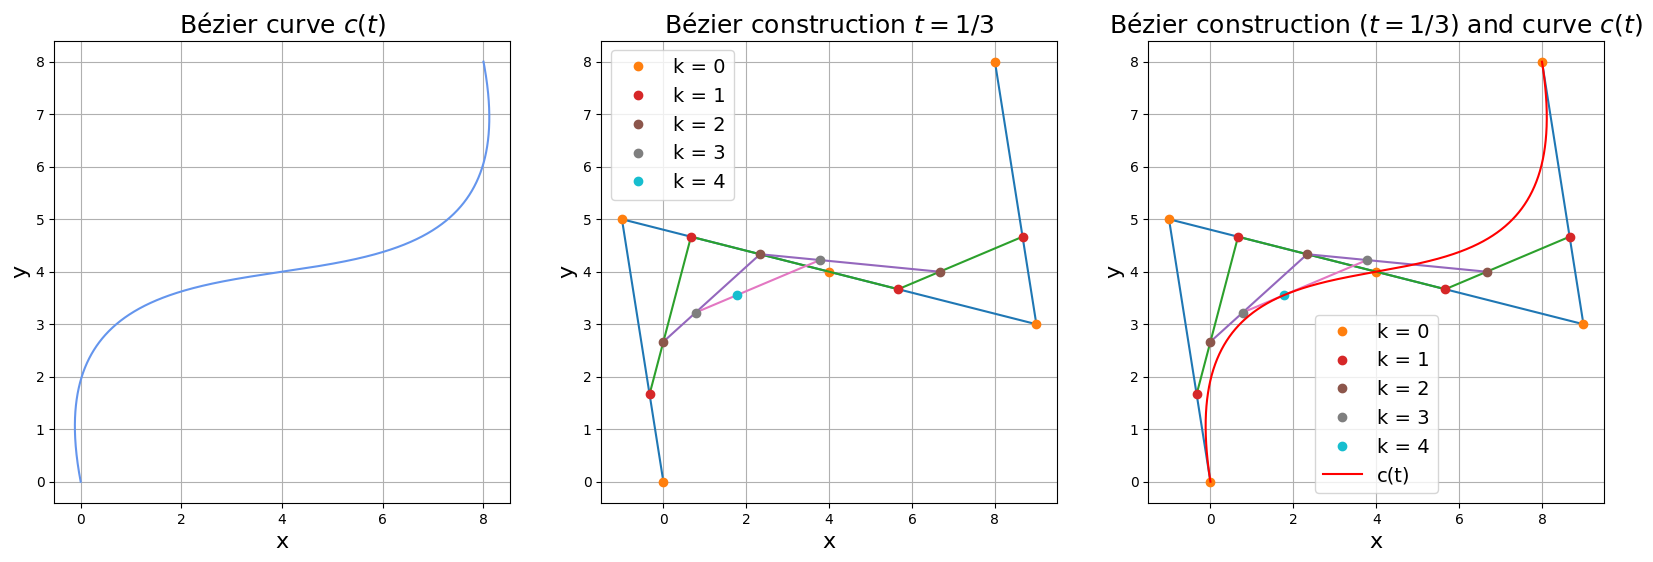

In [ ]:
# The points we want to use in de_casteljau
p0 = [0,0]
p1 = [-1,5]
p2 = [4,4]
p3 = [9,3]
p4 = [8,8]

initPoints = [p0,p1,p2,p3,p4]

# t values to evaluate
t = np.linspace(0, 1, 1000)

# Storage for Bezier points (x, y)
px = np.zeros(len(t))
py = np.zeros(len(t))

# Calculate the Bezier curve and save the values
for j in range(len(t)):
    bezierPoint = de_casteljau(initPoints, t[j])[-1][0]
    px[j] = bezierPoint[:,0]
    py[j] = bezierPoint[:,1]

# Plots the Bezier curve
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.plot(px, py, '-', color='cornflowerblue')
plt.title('Bézier curve $c(t)$', fontsize=18)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()



t = 1/3
bezierConstruction = de_casteljau(initPoints, t)

# Plots the Bezier construction, i.e. linear interpolation of the control points
plt.subplot(1, 3, 2)
for i in range(len(bezierConstruction)):
    x = bezierConstruction[i][0][:,0]
    y = bezierConstruction[i][0][:,1]
    plt.plot(x, y)
    plt.plot(x,y, 'o', label=f'k = {i}')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Bézier construction $t = 1/3$', fontsize=18)
plt.legend(fontsize=14, loc='best')
plt.grid()

# Plots the the two previous images on top of each other
plt.subplot(1, 3, 3)
for i in range(len(bezierConstruction)):
    x = bezierConstruction[i][0][:,0]
    y = bezierConstruction[i][0][:,1]
    plt.plot(x, y)
    plt.plot(x,y, 'o', label=f'k = {i}')
plt.plot(px, py, '-', label='c(t)', color='red')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Bézier construction ($t = 1/3$) and curve $c(t)$', fontsize=18)
plt.legend(fontsize=14, loc='best')
plt.grid()
plt.show()

As one would expect, the Bézier curve seems to fit with the 'construction', and runs through the point $k = 4$. It appears to be quite smooth, and also continuous. 
 



#### f)

The two segments $\mathbf{c}(t)$ and $\mathbf{d}(t)$ are defined as follows:

$$
\mathbf{c}(t) = \mathbf{b}(t;\mathbf{p}_0, \dots, \mathbf{p}_n)
$$

$$
\mathbf{d}(t) = \mathbf{b}(t;\mathbf{q}_0, \dots, \mathbf{q}_n)
$$

&nbsp;

#### 1.

The two different Bézier curves are already $C^{\infty}$ functions, since they are polynomials, thus the critical points are where they meet at $\mathbf{s}(1)$, i.e. $\mathbf{c}(1)$ and $\mathbf{d}(0)$.

&nbsp;

#### 2.
For continuity, there cannot be any jumps between the two segments at the connecting point. Therefore, the end point and start point of $\mathbf{c}(t)$ and $\mathbf{d}(t)$ must coincide. That is,

$\mathbf{c}(1) = \mathbf{d}(0)$

- $\overset{\text{2b)}}{\Rightarrow} \mathbf{p}_n = \mathbf{q}_0$

&nbsp;


#### 3.

For $\mathbf{s}(t)$ to be continuously differentiable, its left and right derivate at the intersection must be equal:

$\mathbf{c}'(1) = \mathbf{d}'(0)$

$\overset{\text{2c)}}{\Rightarrow} n(\mathbf{p}_n - \mathbf{p}_{n-1}) = n (\mathbf{q}_1 - \mathbf{q}_0)$

$\mathbf{p}_n - \mathbf{p}_{n-1} = \mathbf{q}_1 - \mathbf{q}_0$

Since $C^1 \subset C$, we have from 2. that $\mathbf{q}_0 = \mathbf{p}_n$. Thus we obtain the conditions:

- $\mathbf{q}_n = \mathbf{p}_n$

- $\mathbf{q}_1 = 2\mathbf{p}_n - \mathbf{p}_{n-1}$


&nbsp;


#### 4.

The left and right second derivative at the intersection must be equal, thus:

$\mathbf{c}''(1) = \mathbf{d}''(0)$

$\overset{\text{2c)}}{\Rightarrow} n(n-1)(\mathbf{p}_n-2\mathbf{p}_{n-1}+\mathbf{p}_{n-2}) = n(n-1)(\mathbf{q}_0-2\mathbf{q}_1+\mathbf{q}_2)$

$\mathbf{p}_n-2\mathbf{p}_{n-1}+\mathbf{p}_{n-2} = \mathbf{q}_0-2\mathbf{q}_1+\mathbf{q}_2$

Similarily, since $C^2 \subset C^1 \subset C$, we can substitute $\mathbf{q}_0$ and $\mathbf{q}_1$:

$\mathbf{p}_n-2\mathbf{p}_{n-1}+\mathbf{p}_{n-2} = \mathbf{p}_n-2(2\mathbf{p}_n - \mathbf{p}_{n-1})+\mathbf{q}_2$

$-2\mathbf{p}_{n-1} + \mathbf{p}_{n-2} =  -4\mathbf{p}_n - 2\mathbf{p}_{n-1} + \mathbf{q}_2 $

$\mathbf{p}_{n-2} =  -4\mathbf{p}_n + \mathbf{q}_2$

$\mathbf{q}_2 = \mathbf{p}_{n-2} + 4\mathbf{p}_n$

Thus for $\mathbf{s}(t)$ to be $C^2$:

- $\mathbf{q}_0 = \mathbf{p}_n$

- $\mathbf{q}_1 = 2\mathbf{p}_n - \mathbf{p}_{n-1}$

- $\mathbf{q}_2 = \mathbf{p}_{n-2} + 4\mathbf{p}_n$

&nbsp;

#### 5.

We have for $n = 3$ and data points $\mathbf{d}_0, \mathbf{d}_1, \mathbf{d}_2$, with $\mathbf{s}(h) = \mathbf{d}_h$ for $h = 0,1,2$ that
- $\mathbf{p}_0 = \mathbf{s}(0) = \mathbf{d}_0$
- $\mathbf{q}_0 = \mathbf{s}(1) = \mathbf{d}_1$
- $\mathbf{q}_3 = \mathbf{s}(2) = \mathbf{d}_2$



If  $\mathbf{s}(t) \in C^1$, we obtain the additional requirements from earlier:
- $\mathbf{q}_0 = \mathbf{p}_3$
- $\mathbf{q}_1 = 2\mathbf{p}_3-\mathbf{p}_2$


In other words, $\mathbf{p}_1, \mathbf{p}_2, \mathbf{q}_2$ are free to choose, i.e. three degrees of freedom.

&nbsp;

If  $\mathbf{s}(t) \in C^2$, then:

- $\mathbf{q}_0 = \mathbf{p}_3$
- $\mathbf{q}_1 = 2\mathbf{p}_3-\mathbf{p}_2$
- $\mathbf{q}_2 = \mathbf{p}_{n-2} + 4\mathbf{p}_n$

By comparison, we lose one degree of freedom by imposing one additional constrain, as $\mathbf{q}_2$ now is fixed . 
Thus we are left with two degrees of freedom.

&nbsp;

#### 6.

Now we let the Bézier curve be periodic, that is $\mathbf{s}(t) = \mathbf{s}(2+ t)$, and continuously differentiable. 

Periodicity implies:
$\mathbf{s}(0) = \mathbf{p}_0 = \mathbf{d}_0 = \mathbf{s}(2) = \mathbf{q}_3 = \mathbf{d}_2$
$\Rightarrow \mathbf{p}_0 = \mathbf{q}_3$

Thus we have the conditions for the interpolation points:
- $\mathbf{p}_0 = \mathbf{q}_3 = \mathbf{d}_0 = \mathbf{d}_2$
- $\mathbf{q}_0 = \mathbf{d}_1$

For $\mathbf{s}(t) \in C^1$:
- $\mathbf{q}_0 = \mathbf{p}_3$
- $\mathbf{q}_1 = 2\mathbf{p}_3-\mathbf{p}_2$

Also since the Bézier curve now is periodic, it needs to be differentiable in its second 'stitch', i.e.:
$\mathbf{c}'(0) = \mathbf{d}'(1) \overset{\text{2c, n=3}}{\Rightarrow} \mathbf{q}_3 - \mathbf{q}_2 = \mathbf{p}_1 - \mathbf{p}_0$

- $\Rightarrow \mathbf{q}_2 = 2\mathbf{p}_0 - \mathbf{p}_1$

Hence, we can see that we only have two points left to choose freely, which means that we have two degrees of freedom.

### Task 3. Interpolation with (composite, cubic) Bézier curves

For the rest of this project, we will consider cubic curves, i.e. $n=3$.

#### a)

Furthermore, we want to make compositve Bézier curves.

The function below uses de Casteljau's algorithm for $m$ different segments. To do this, we loop through values of $t \in [0, 1]$ for each segment.


In [ ]:
def composite_Bezier(P,t):
    '''
    Calculates control points for periodic interpolation

    Parameters:

        Input
            P:     Control points     [p_{0,1},p_{1,1},p_{2,1},p_{3,1},p_{0,2} ...,p_{3,m}]
            t:     Time values [t_0, ..., t_{m-1}]
        
        Output
            B:     Points of the compostite Bézier curve.
    '''
    # The number of segments m, and points N per segment
    m = int(t[-1])
    N = int(len(t)/m)
    
    B = np.zeros((len(t),2))
    
    #Loop through m times
    for i in range(0,m):
       
        #Perform de_casteljau for N values of t0.
        for t0 in range(N):
            A = de_casteljau(P[i],t[i*N+t0]-i)[-1]
            a = A[0][0][0]     
            b = A[0][0][1]
            B[i*N + t0] = [a,b]
    return B

 The code below tests our function and plots the corresponding composite curve.

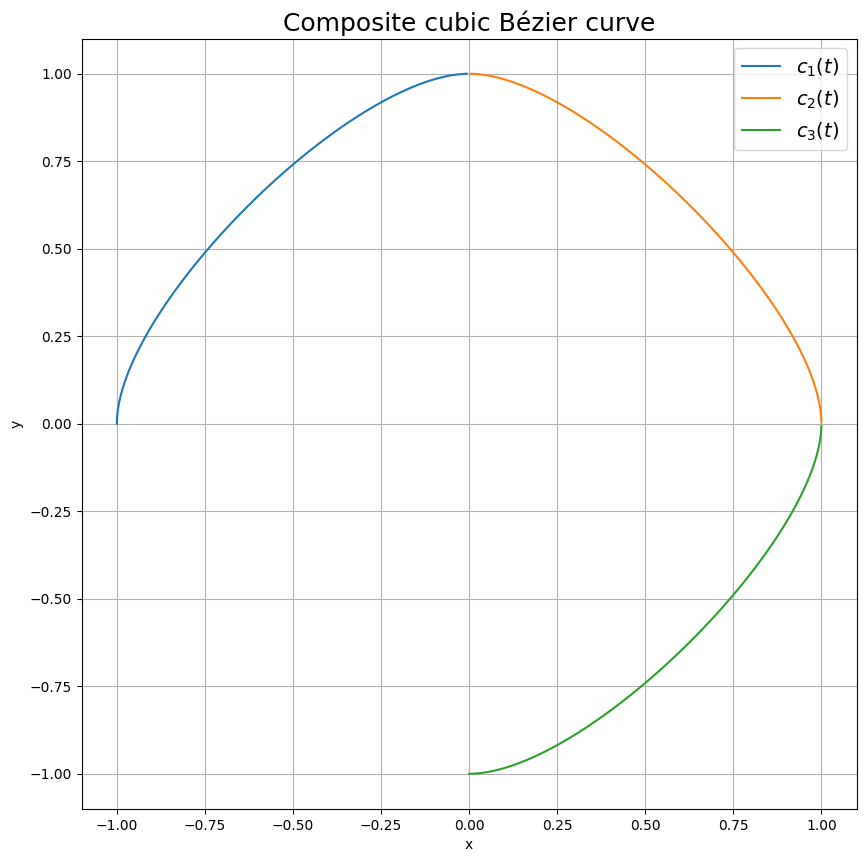

In [ ]:
# Control points of the first curve
p01 = [-1,0]
p11 = [-1,1/3]
p21 = [-1/3,1]
p31 = [0,1]
c1 = [p01,p11,p21,p31]

# Control points of the second curve
p02 = [0,1]
p12 = [1/3,1]
p22 = [1,1/3]
p32 = [1,0]
c2 = [p02,p12,p22,p32]

# Control points of the third curve
p03 = [1,0]
p13 = [1,-1/3]
p23 = [1/3,-1]
p33 = [0,-1]
c3 = [p03,p13,p23,p33]

# The three curves put into one list
P = [c1,c2,c3]

M = 100 # Steps for each curve
t = np.linspace(0,len(P),len(P)*M)

B = composite_Bezier(P,t)


# Plot of the composite bezier curve.
plt.plot(B[:M, 0], B[:M,1], label=f'$c_1(t)$')
plt.plot(B[M:(2*M),0], B[M:(2*M),1], label=f'$c_2(t)$')
plt.plot(B[(2*M):,0], B[(2*M):,1], label=f'$c_3(t)$')
plt.grid()
plt.legend(fontsize=14, loc='best')
plt.title('Composite cubic Bézier curve', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The resulting curve appears to be continuous, and also looks quite smooth, which we expected based on how the algorithm was implemented.


#### b)

We will derive an algorithm that calculates the control points for the periodic cubic Bézier curve.
That is, we need to find $\mathbf{p}_{0,i}$, $\mathbf{p}_{1,i}$, $\mathbf{p}_{2,i}$ and $\mathbf{p}_{3,i}$. 

For periodicity, we have that
$$
\mathbf{B}(0) = \mathbf{B}(m)
$$
$$
\Rightarrow \mathbf{a}_m = \mathbf{a}_0
$$

and 

$$
\mathbf{B}'(0) = \mathbf{B}'(m)
$$
$$
\Rightarrow \mathbf{v}_m = \mathbf{v}_0.
$$

&nbsp;

Since we need $\mathbf{B}(i) = \mathbf{a}_i$, we have
$$
\mathbf{p}_{0,i} = \mathbf{a}_i,
$$
and since we need continuity between each segment, we have 
$$
\mathbf{p}_{3,i} = \mathbf{p}_{0,i+1} = \mathbf{a}_{i+1}
$$
$$
\Rightarrow \mathbf{p}_{3,i} = \mathbf{a}_{i+1}
$$

&nbsp;

For $\mathbf{p}_{1,i}$ we have the result from 2c) part 1)

$$
\mathbf{B}'(i) = \mathbf{v}_i = n(\mathbf{p}_{1,i} - \mathbf{p}_{0,i})
$$
$$
\mathbf{v}_i = 3(\mathbf{p}_{1,i} - \mathbf{a}_{i})
$$
$$
\Rightarrow \mathbf{p}_{1,i} = \mathbf{a}_i + \frac{\mathbf{v}_i}{3},
$$

where $\mathbf{v}_i$ is the velocity at point $i$.

&nbsp;

By considering the next segment, $i+1$, we can obtain $\mathbf{p}_{2,i}$:
$$
\mathbf{B}'(i+1) = \mathbf{v}_{i+1} \overset{\text{2c)}}{=} n(\mathbf{p}_{3,i} - \mathbf{p}_{2,i}) = 3(\mathbf{p}_{0,i+1} - \mathbf{p}_{2,i})
$$
$$
\Rightarrow \mathbf{p}_{2,i} = \mathbf{a}_{i+1} - \frac{\mathbf{v}_{i+1}}{3}
$$

&nbsp;
 
As discussed previously, the properties at the 'stitch' between the segments decides the curve's smoothness. $\mathbf{B}(t)$ is constructed such that it is continuosly differentiable in the joints, i.e. we have that $\mathbf{B}(t) \in C^1$.

Our calculations for the control points above are implemented in the function **interpolate_periodic** below.

In [ ]:
def interpolate_periodic(A, V):
    '''
    Calculates control points for periodic interpolation

    Parameters:

        Input
            A:     Interpolation points     [a_0, ..., a_{m-1}]
            V:     Corresponding velocities [v_0, ..., v_{m-1}]
        
        Output
            P:     Matrix of control points
    '''

    P = []
    
    # Dimensions
    d = len(A[0])
    m = len(A)
    n = 3 
    for i in range(m-1):
        # Find the control points
        p_0i = A[i]
        p_1i = A[i] + V[i]/n
        p_2i = A[i+1] - V[i+1]/n
        p_3i = A[i+1]

        P.append([p_0i, p_1i, p_2i,p_3i])
        
    # Ensure periodicity
    p_0m = A[m-1]
    p_1m = p_0m + V[m-1]/n
    p_2m = A[0] - V[0]/n
    p_3m = A[0]

    P.append([p_0m, p_1m, p_2m,p_3m])   

    return P

#### c)

To create the letter, we drew the letter by hand in a coordinate system and wrote down the important interpolation points in the matrix $A$. Then we estimated the direction of these points, and stored these in the $V$ matrix.

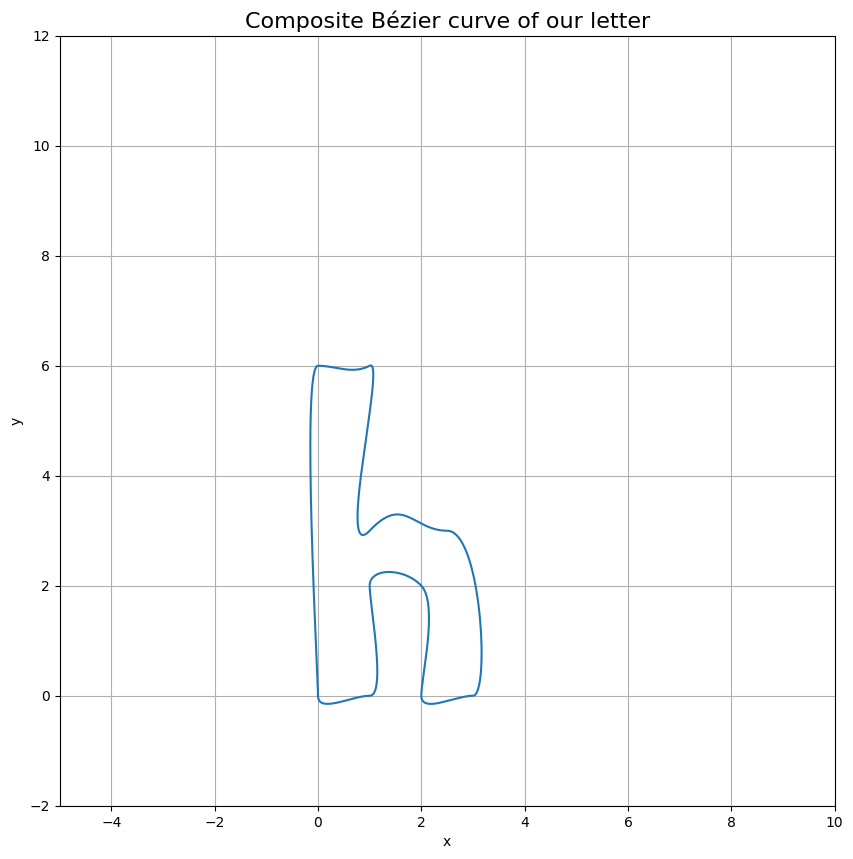

In [ ]:
A = np.array([[0,0],[0,6],[1,6],[1,3],[2.5,3],[3,0], [2,0],[2,2], [1,2], [1,0]]) # h
V = np.array([[0,1],[1,0],[1,0.5],[2,2],[2,0],  [-1,0],[0,1],[-1,1],[0,-1],[-1,0]]) # V

# Find the P matrix and then find the comoposite Bézier curve.
P = interpolate_periodic(A,V)
P_ = np.copy(P)
M = 100
t = np.linspace(0,len(P),len(P)*M)
B = composite_Bezier(P_,t)

# Plot the composite Bézier curve of the letter
plt.plot(B[:,0],B[:,1])
plt.xlim(-5,10)
plt.ylim(-2,12)
plt.grid()
plt.title('Composite Bézier curve of our letter', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

One can clearly see that it looks like an 'h'. It seems to be continuous and smooth.

Additionally, one can see the curve's cubic nature, e.g. by looking at the middle 'arc' between the points $(1,3)$ and $(2.5, 3)$.


#### d)
We want to see what happens if we scale all the points in $P$ with 2.

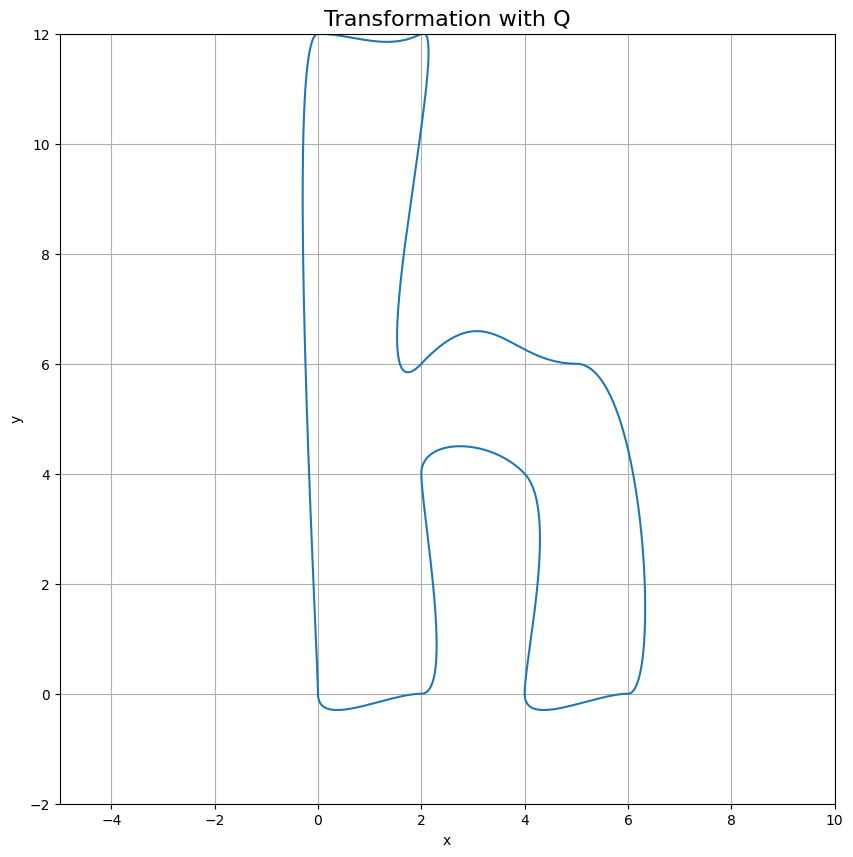

In [ ]:
# Transform P to Q, by multiplying P by 2.
Q = np.copy(P)
Q = (2*np.array(Q)).tolist()
M = 100 #We need multiple of m
t = np.linspace(0,len(Q),len(Q)*M)
B = composite_Bezier(Q,t)

# Plot the letter
plt.plot(B[:,0],B[:,1])
plt.xlim(-5,10)
plt.ylim(-2,12)
plt.grid()
plt.title('Transformation with Q', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we see, $Q$ linearly scales the letter by a factor of 2 (and the origin remains fixed).

Furthermore, we want to see what happens if we transform the points in $P$ with $R$. 

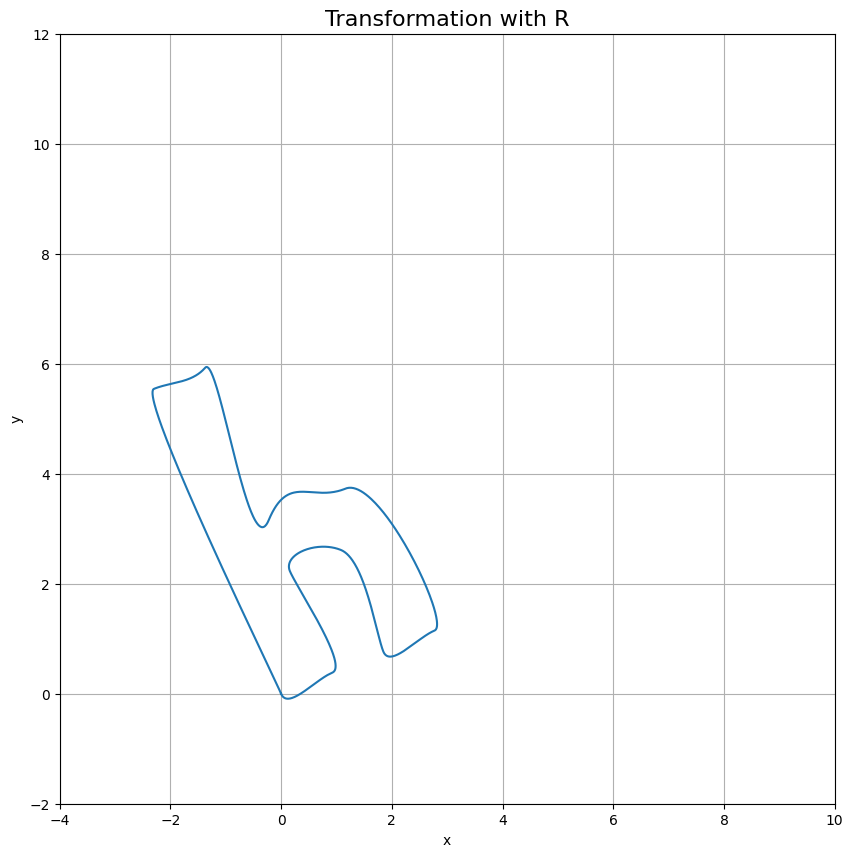

In [ ]:
# Degrees of rotation
r =  np.pi/8

# Rotation matrix R
R_matrix = np.array([
    [np.cos(r),-np.sin(r)],
    [np.sin(r),np.cos(r)]
])
R = np.copy(P)

# Apply the matrix to all the P's
for i in range(len(P)):
    R[i][0] = R_matrix@R[i][0]
    R[i][1] = R_matrix@R[i][1]
    R[i][2] = R_matrix@R[i][2]
    R[i][3] = R_matrix@R[i][3]

M = 100
t = np.linspace(0,len(R),len(R)*M)
B = composite_Bezier(R,t)

# Plot the letter with rotation
plt.plot(B[:,0],B[:,1])
plt.xlim(-4,10)
plt.ylim(-2,12)
plt.grid()
plt.title('Transformation with R', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we see, $R$ rotates the letter counterclockwise (with what looks to be $\frac{\pi}{8} = 22.5^{\circ}$), as we should expect from a rotation matrix with argument $\theta = \frac{\pi}{8}$.

Next, we want to investigate what happens if we transform the points in $P$ with $S$. 

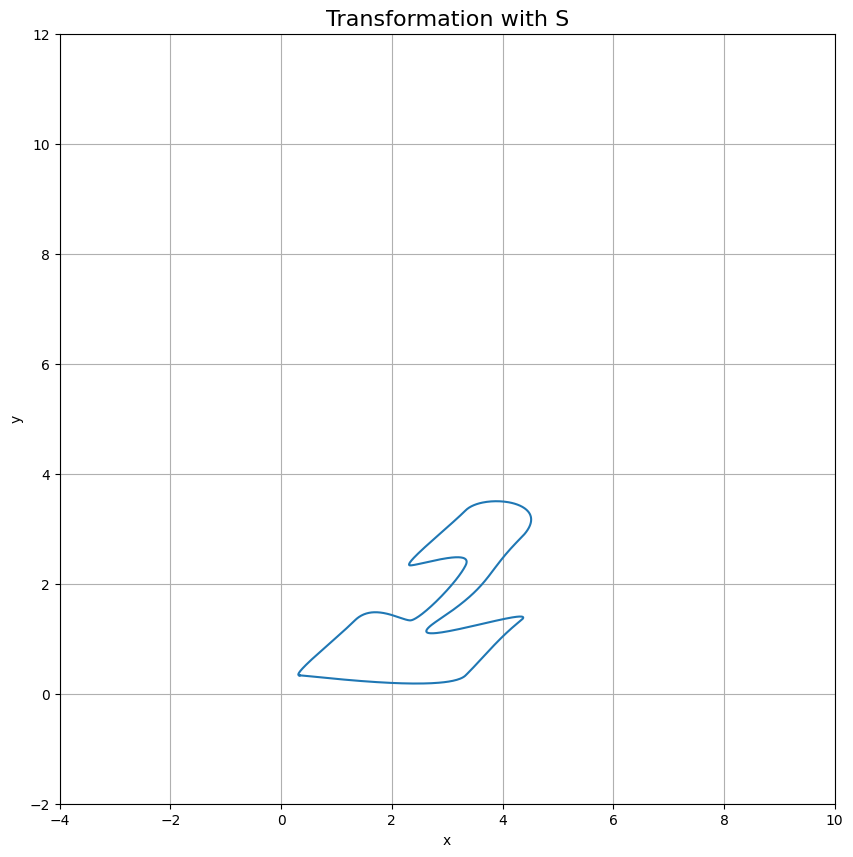

In [ ]:
# Define the matrix of S
S_matrix = np.array([
    [1,0.5],
    [1,0]
])

S = np.copy(P)

# Apply the transformation to all the P's
for i in range(len(S)):
    S[i][0] = S_matrix@S[i][0] + 1/3
    S[i][1] = S_matrix@S[i][1] + 1/3
    S[i][2] = S_matrix@S[i][2] + 1/3
    S[i][3] = S_matrix@S[i][3] + 1/3

M = 100 
t = np.linspace(0,len(S),len(S)*M)
B = composite_Bezier(S,t)

# Plot the letter with the transformation
plt.plot(B[:,0],B[:,1])
plt.xlim(-4,10)
plt.ylim(-2,12)
plt.grid()
plt.title('Transformation with S', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This transformation is a combination of shearing, scaling and mirroring (the first matrix), as well as translation (the second vector added). Applying the first matrix sheares and scales the letter horizontally. Additionally, the letter is mirrored at the line $y=x$, since the $y$-component is mapped to the original $x$-component.

Lastly, the letter is moved by $\frac{1}{3}$ in both $x$ and $y$ direction.

We want to see what happens if we transform the points in $P$ with T.

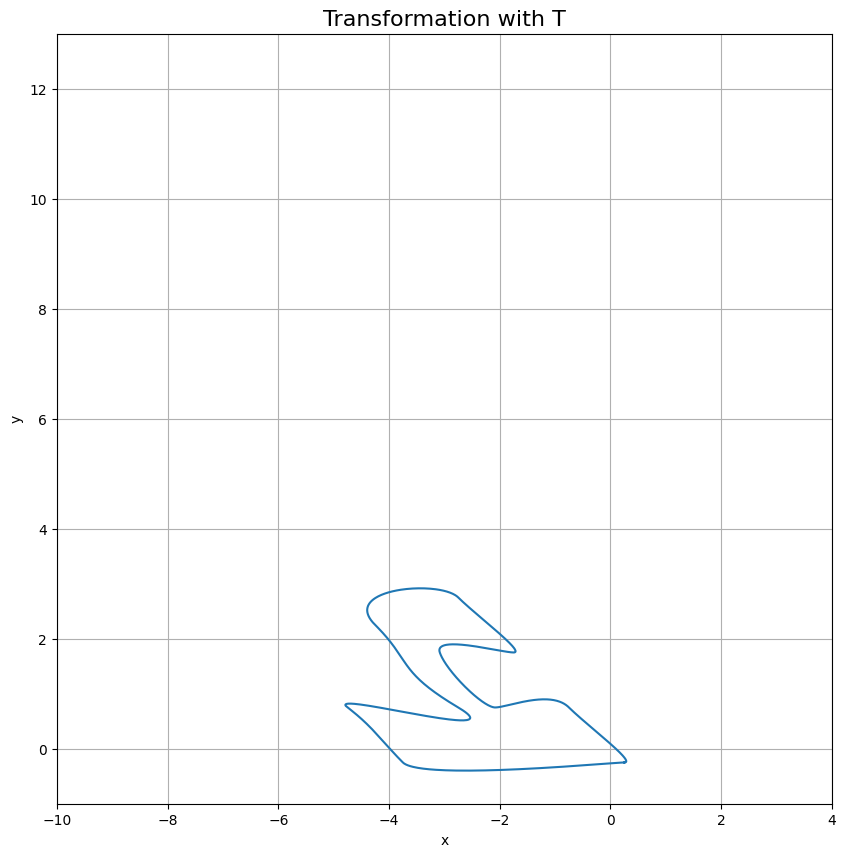

In [ ]:
# Define the T_matrix
T_matrix = np.array([
    [-1,-2/3],
    [1,0]
])

T = np.copy(P)
# Transform all the P's with T
for i in range(len(T)):
    T[i][0] = T_matrix@T[i][0] + 1/4*np.array([1,-1])
    T[i][1] = T_matrix@T[i][1] + 1/4*np.array([1,-1])
    T[i][2] = T_matrix@T[i][2] + 1/4*np.array([1,-1])
    T[i][3] = T_matrix@T[i][3] + 1/4*np.array([1,-1])

M = 100
t = np.linspace(0,len(P),len(P)*M)
B = composite_Bezier(T,t)

# Plot the letter with the T_matrix transformation
plt.plot(B[:,0],B[:,1])
plt.xlim(-10,4)
plt.ylim(-1,13)
plt.grid()
plt.title('Transformation with T', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The transformation T is quite similar to S, as it applies a horizontal shear with scaling, and then mirrors around $y =x$. In addition, the letter is mirrored around the $y$-axis, as the first row in the matrix is negative. 

Finally, the $x$-component is moved $\frac{1}{4}$ to the right, and $y$ is moved $\frac{1}{4}$ down. 

### Task 4. Optimisation with Bézier curves

#### a)

We want to reduce the amount of storage, by reducing the matrix $\mathbf{P}$.


Since $\mathbf{B}(t) \in C^1$, we can use our result from task 2f, generalized to $i$ segments, and with $n = 3$: 
$$
\mathbf{p}_{3, i} - \mathbf{p}_{2, i} = \mathbf{p}_{1, i+1} - \mathbf{p}_{0, i+1}
$$

$$
\mathbf{p}_{0, i+1} - \mathbf{p}_{2, i} = \mathbf{p}_{1, i+1} - \mathbf{p}_{0, i+1}
$$

$$
\Rightarrow \mathbf{p}_{2,i} = 2\mathbf{p}_{0,i+1}-\mathbf{p}_{1,i+1},
$$
where we have used that $\mathbf{B}(t)$ is continuous, i.e. $\mathbf{p}_{3, i} = \mathbf{p}_{0, i+1}$

Thus, we can omit the storage of $\mathbf{p}_{2,i}$.



We can recover both neighboring points to $\mathbf{p}_{0,i+1}$, i.e. $\mathbf{p}_{2,i}$ and $\mathbf{p}_{1,i+1}$, in terms of the velocity $\mathbf{v}_{i+1}$ at $\mathbf{p}_{0,i+1}$, by using derived properties from task 3b):

$$
\mathbf{v}_{i+1} = 3(\mathbf{p}_{3,i} - \mathbf{p}_{2,i}) = 3(\mathbf{p}_{0,i+1} - \mathbf{p}_{2,i})
$$


$$
\Rightarrow \mathbf{p}_{2,i} = \mathbf{p}_{0,i+1} - \frac{\mathbf{v}_{i+1}}{3}
$$

$$
\mathbf{v}_{i+1} = 3(\mathbf{p}_{1,i+1}-\mathbf{p}_{0,i+1})
$$


$$
\Rightarrow \mathbf{p}_{1,i+1} = \mathbf{p}_{0,i+1} + \frac{\mathbf{v}_{i+1}}{3}
$$


#### b)

We want to minimize the squared acceleration of the curve
$$
F(\mathbf{P}) := \int_0^m \lVert \mathbf{B}''(t) \rVert _2^2 \text{d}t
$$

with respect to the control points $\mathbf{P}$.

First, let us consider one segment with $\mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3 \in \mathbb{R}^2$, with a corresponding cubic Bézier curve $\mathbf{b}_3$. Then we want to derive a closed form for the integral

$$
\int_0^1 \lVert \mathbf{b}_3''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) \rVert _2^2 \; \text{d}t.
$$

Recall that the second derivative of a Bézier curve is given by

$$
\mathbf{b}_n''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) = n(n-1) \overset{n-2}{\underset{i = 0} \sum} B_{i, n-2}(t)(\mathbf{q}_i - 2\mathbf{q}_{i+1} + \mathbf{q}_{i+2})
$$

Thus, since we have a cubic curve ($n=3$):

$$
\mathbf{b}_3''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) = 6 \overset{1}{\underset{i = 0} \sum} B_{i, 1}(t)(\mathbf{q}_i - 2\mathbf{q}_{i+1} + \mathbf{q}_{i+2})
$$

$$
= 6((1-t)(\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2}) + t(\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3}))
$$

By taking the 2-norm squared, we obtain the following expression for the integrand

$$
\lVert \mathbf{b}_3''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) \rVert _2^2 = \lVert 6((1-t)(\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2}) + t(\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3})) \rVert _2^2
$$

$$
= 6^2 ((1-t)^2 \lVert \mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2} \rVert _2^2 + 2t(1-t)\langle \mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2}, \mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3} \rangle + t^2 \lVert \mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3} \rVert _2^2)
$$

$$
= 36((1-t)^2(\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})^2 + 2t(1-t)(\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})(\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3}) + t^2 (\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3})^2)
$$

Where we have used that by defining $\mathbf{u},\mathbf{v} \in \mathbb{R}^d$, 

$$
\lVert \mathbf{u} \rVert _2^2 = \mathbf{u}^2 \quad \text{and} \quad \langle \mathbf{u}, \mathbf{v} \rangle = \mathbf{u}\mathbf{v}
$$

and later, we will use that we can differentiate these in (almost) the same way as variables: 

$$
\frac{\partial}{\partial \mathbf{u}} \mathbf{u}^2 = 2\mathbf{u} \quad \text{and} \quad \frac{\partial}{\partial \mathbf{u}} \mathbf{u}\mathbf{v} = \mathbf{v}.
$$


Then, by integrating

$$
\int_0^1 \lVert \mathbf{b}_3''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) \rVert _2^2 \; \text{d}t = 12((\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})^2 + (\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})(\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3}) + (\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3})^2)
$$

$$
= 12(\mathbf{q}_0^2 + 3 \mathbf{q}_1^2 + 3\mathbf{q}_2^2 + \mathbf{q}_3^2 - 3\mathbf{q}_0 \mathbf{q}_1 - 3\mathbf{q}_1 \mathbf{q}_2 - 3 \mathbf{q}_2 \mathbf{q}_3 + \mathbf{q}_0 \mathbf{q}_3)
$$

Where we have used that

$$
\int_0^1 (1-t)^2 \text{d}t = \int_0^1 2t(1-t) \text{d}t = \int_0^1 t^2 \text{d}t = \frac{1}{3}
$$



Furthermore, we want to find the gradient of $\tilde{F}$, where

$$
\tilde{F}(\mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) := \int_0^1 \lVert \mathbf{b}_3''(t; \mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3) \rVert _2^2 \; \text{d}t
$$

The gradient of $\tilde{F}$ is

$$
\nabla\tilde{F} = 
\begin{pmatrix} \frac{\partial\tilde{F}}{\partial{\mathbf{q}_0}} \\ \frac{\partial\tilde{F}}{\partial{\mathbf{q}_1}} \\ \frac{\partial\tilde{F}}{\partial{\mathbf{q}_2}} \\ \frac{\partial\tilde{F}}{\partial{\mathbf{q}_3}} \end{pmatrix} \;,
$$

that is, we need to find the partial derivates of $\tilde{F}$

$$
\frac{\partial\tilde{F}}{\partial{\mathbf{q}_0}} = \frac{\partial}{\partial{\mathbf{q}_0}}(12((\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})^2 + (\mathbf{q}_0 - 2\mathbf{q}_{1} + \mathbf{q}_{2})(\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3}) + (\mathbf{q}_1 - 2\mathbf{q}_{2} + \mathbf{q}_{3})^2))
$$

$$
= 12(2\mathbf{q}_0 -3\mathbf{q}_1 +  0\mathbf{q}_2 + \mathbf{q}_3)
$$

&nbsp;

$$
\frac{\partial\tilde{F}}{\partial{\mathbf{q}_1}} =12(-3\mathbf{q}_0 +6\mathbf{q}_1 -3\mathbf{q}_2 + 0\mathbf{q}_3)
$$

&nbsp;

$$
\frac{\partial\tilde{F}}{\partial{\mathbf{q}_2}} =12(0\mathbf{q}_0 -3\mathbf{q}_1 + 6\mathbf{q}_2 - 3\mathbf{q}_3)
$$

&nbsp;

$$
\frac{\partial\tilde{F}}{\partial{\mathbf{q}_3}} =12(\mathbf{q}_0 + 0\mathbf{q}_1 - 3\mathbf{q}_2 + 2\mathbf{q}_3)
$$

Which yields the gradient

$$
\nabla\tilde{F} = 
12\begin{pmatrix}  
2\mathbf{q}_0 -3\mathbf{q}_1 +  0\mathbf{q}_2 + \mathbf{q}_3
\\ -3\mathbf{q}_0 +6\mathbf{q}_1 -3\mathbf{q}_2 + 0\mathbf{q}_3 
\\ 0\mathbf{q}_0 -3\mathbf{q}_1 + 6\mathbf{q}_2 - 3\mathbf{q}_3
\\ \mathbf{q}_0 + 0\mathbf{q}_1 - 3\mathbf{q}_2 + 2\mathbf{q}_3
\end{pmatrix} \;
$$

or, if we let $\mathbf{x} = (\mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3)^T$:


$$
\nabla\tilde{F} = \tilde{A}\mathbf{x} =
12 
\begin{pmatrix}
2 & -3 & 0 & 1 \\
-3 & 6 & -3 & 0 \\
0 & -3 & 6 & -3 \\
1 & 0 & -3 & 2
\end{pmatrix}
\mathbf{x}
$$




Furthermore, we want to sketch how the gradient of $F$ looks like. 

First, let's omit the redundant data by introducing, as previously derived, 

- $\mathbf{p}_{2,i} = 2\mathbf{p}_{0,i+1} - \mathbf{p}_{1,i+1}$

- $\mathbf{p}_{3,i} = \mathbf{p}_{0,i+1}$

Then the $i$'th segment of $F$,  $\tilde{F}_i$ can be rewritten as

$$
\tilde{F}(\mathbf{p}_{0,i}, \mathbf{p}_{1,i}, 2\mathbf{p}_{0, i+1} - \mathbf{p}_{1, i+1}, \mathbf{p}_{0, i+1}) =
$$

$$
12(\mathbf{p}_{0,i}^2 + 3\mathbf{p}_{1, i}^2 + 7\mathbf{p}_{0, i+1}^2 - 9\mathbf{p}_{0, i+1}\mathbf{p}_{1,i+1} + 3\mathbf{p}_{1,i+1}^2 - 3\mathbf{p}_{0,i}\mathbf{p}_{1,i} - 6\mathbf{p}_{1,i}\mathbf{p}_{0, i+1} + 3\mathbf{p}_{1,i}\mathbf{p}_{1, i+1} + \mathbf{p}_{0,i}\mathbf{p}_{0, i+1})
$$ 

We have, since $\tilde{F}$ is a segment of $F$, and $\mathbf{B}(t)$ is continuous, that

$$
F(\mathbf{P}) = \sum_{i=1}^{m-1} \tilde{F}_i  + \tilde{F}_m,
$$

where the $\tilde{F}_m$ is not a part of the sum as the above relation holds for $i = 1, \dots, m-1$.


Now, since $\mathbf{B}(t)$ is continuously differentiable, and due to the linearity of the gradient operator that

$$
\nabla F(\mathbf{P}) = \nabla \left(\sum_{i=1}^{m-1} \tilde{F}_i + \tilde{F}_m \right) = \sum_{i=1}^{m-1} \nabla \tilde{F}_i + \nabla \tilde{F}_m
$$

In order to find this gradient, we note that $\tilde{F}_i$ is a linear combination of $\mathbf{p}_{0, i}, \mathbf{p}_{1, i}, \mathbf{p}_{0, i+1}$ and $\mathbf{p}_{1, i+1}$. Thus, for all $i = 2, \dots, m-1$, the partial derivatives $\frac{\partial}{\partial \mathbf{p}_{0, i}}$ and $\frac{\partial}{\partial \mathbf{p}_{1, i}}$ appear twice in the sum, i.e. when some $j = i$ and $j=i-1$, for $j = 2, \dots, m-1$. 


$$
\frac{\partial \tilde{F}}{\partial \mathbf{p}_{0, j}} = 12 \frac{\partial}{\partial \mathbf{p}_{0, j}}(\mathbf{p}_{0,i}^2 + 3\mathbf{p}_{1, i}^2 + 7\mathbf{p}_{0, i+1}^2 - 9\mathbf{p}_{0, i+1}\mathbf{p}_{1,i+1} + 3\mathbf{p}_{1,i+1}^2 - 3\mathbf{p}_{0,i}\mathbf{p}_{1,i} - 6\mathbf{p}_{1,i}\mathbf{p}_{0, i+1} + 3\mathbf{p}_{1,i}\mathbf{p}_{1, i+1} + \mathbf{p}_{0,i}\mathbf{p}_{0, i+1})
$$

$$
= 12(\overbrace{(2\mathbf{p}_{0, j} + \mathbf{p}_{0, j+1} - 3\mathbf{p}_{1, j})}^{j=i}+ \overbrace{(\mathbf{p}_{0,j-1} + 14\mathbf{p}_{0, j} - 6\mathbf{p}_{1, j-1} -9\mathbf{p}_{1, j} )}^{j =i-1} )
$$

$$
= 12( 16\mathbf{p}_{0,j} -12\mathbf{p}_{1, j} + \mathbf{p}_{0, j-1} -6\mathbf{p}_{1, j-1} + \mathbf{p}_{0, j+1} )
$$


Similarly,

$$
\frac{\partial \tilde{F}}{\partial \mathbf{p}_{1, j}} = 12 \frac{\partial}{\partial \mathbf{p}_{0, j}}(\mathbf{p}_{0,i}^2 + 3\mathbf{p}_{1, i}^2 + 7\mathbf{p}_{0, i+1}^2 - 9\mathbf{p}_{0, i+1}\mathbf{p}_{1,i+1} + 3\mathbf{p}_{1,i+1}^2 - 3\mathbf{p}_{0,i}\mathbf{p}_{1,i} - 6\mathbf{p}_{1,i}\mathbf{p}_{0, i+1} + 3\mathbf{p}_{1,i}\mathbf{p}_{1, i+1} + \mathbf{p}_{0,i}\mathbf{p}_{0, i+1})
$$

$$
= 12( \overbrace{(-3\mathbf{p}_{0,j} -6\mathbf{p}_{0, j+1} +6\mathbf{p}_{1,j} +3\mathbf{p}_{1, j+1} )}^{j=i} + \overbrace{(-9\mathbf{p}_{0,j} + 3\mathbf{p}_{1, j-1} +6\mathbf{p}_{1, j})}^{j=i-1} )
$$

$$
= 12( -12\mathbf{p}_{0, j} + 12\mathbf{p}_{1, j} + 3\mathbf{p}_{1, j-1} -6\mathbf{p}_{0, j+1} +3\mathbf{p}_{1, j+1} )
$$

For the special cases of $i = 1$ and $i = m$:

$\textbf{i=1:}$

Since $i = 1$ only appears once in the sum, we only get the first segments of the partials, i.e.:

$$
\frac{\partial \tilde{F}}{\partial \mathbf{p}_{0, 1}} = 12(2\mathbf{p}_{0, 1} + \mathbf{p}_{0, 2} - 3\mathbf{p}_{1, 1}),
$$
and
$$
\frac{\partial \tilde{F}}{\partial \mathbf{p}_{1, 1}} = 12(-3\mathbf{p}_{0,1} -6\mathbf{p}_{0, 2} +6\mathbf{p}_{1,1} +3\mathbf{p}_{1, 2})
$$


$\mathbf{i = m:}$

We have that $\nabla \tilde{F}_m = \nabla \tilde{F}$, which we have from earlier:

$$
\nabla \tilde{F}_m = 
12\begin{pmatrix}  
2\mathbf{q}_{0,m} -3\mathbf{q}_{1,m} +  \mathbf{q}_{3,m}
\\ -3\mathbf{q}_{0,m} +6\mathbf{q}_{1,m} -3\mathbf{q}_{2,m} 
\\ -3\mathbf{q}_{1,m} + 6\mathbf{q}_{2,m} - 3\mathbf{q}_{3,m}
\\ \mathbf{q}_{0,m} - 3\mathbf{q}_{2,m} + 2\mathbf{q}_{3,m}
\end{pmatrix} \;
$$


Thus, to summarize, the gradient of $F$ can be sketched as:

$$
\nabla F = 
\begin{pmatrix} \frac{\partial \tilde{F}}{\partial \mathbf{p}_{0, 1}} \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{1, 1}} \\ \vdots \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{0, j}} \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{1, j}} \\ \vdots \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{0, m}} \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{1, m}} \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{2, m}} \\ \frac{\partial \tilde{F}}{\partial \mathbf{p}_{3, m}} \end{pmatrix} \;
= 12\begin{pmatrix} 2\mathbf{p}_{0, 1} + \mathbf{p}_{0, 2} - 3\mathbf{p}_{1, 1} \\ -3\mathbf{p}_{0,1} -6\mathbf{p}_{0, 2} +6\mathbf{p}_{1,1} +3\mathbf{p}_{1, 2} \\ \vdots \\ 16\mathbf{p}_{0,j} -12\mathbf{p}_{1, j} + \mathbf{p}_{0, j-1} -6\mathbf{p}_{1, j-1} + \mathbf{p}_{0, j+1} \\ -12\mathbf{p}_{0, j} + 12\mathbf{p}_{1, j} + 3\mathbf{p}_{1, j-1} -6\mathbf{p}_{0, j+1} +3\mathbf{p}_{1, j+1} \\ \vdots \\ 2\mathbf{p}_{0,m} -3\mathbf{p}_{1,m} +  \mathbf{p}_{3,m} \\ -3\mathbf{p}_{0,m} +6\mathbf{p}_{1,m} -3\mathbf{p}_{2,m}  \\ -3\mathbf{p}_{1,m} + 6\mathbf{p}_{2,m} - 3\mathbf{p}_{3,m} \\ \mathbf{p}_{0,m} - 3\mathbf{p}_{2,m} + 2\mathbf{p}_{3,m} \end{pmatrix} \;
$$

Where the 'middle' part of the gradient is repeated pairwise for all $j = 2, 3, \dots, m-1$

#### c)

A (local) minimiser, $\mathbf{x}^*$, for $\tilde{F}$ has to fulfill $\nabla \tilde{F}(\mathbf{x}^*) = 0$.  

Now we want to investigate if there exists a unique minimiser for $\tilde{F}$.
We have previously defined $\nabla \tilde{F} = \tilde{A}\mathbf{x}$. Further, we can calculate rank($\tilde{A}$) to determine if the solution of
$$
\tilde{A}\mathbf{x} = 0
$$
is unique, i.e. uniqueness $\Leftrightarrow$ rank$\tilde{A} = 4$. Or in other words, $0$ degrees of freedom.

The code below, calculates the rank by using **np.linalg.matrix_rank**.


In [ ]:
Ã = 12*np.array([
    [2, -3, 0, 1], 
    [-3, 6, -3, 0], 
    [0, -3, 6, -3], 
    [1, 0, -3, 2]], dtype=float) 

print(f'The rank of Ã is: {np.linalg.matrix_rank(Ã)}')

The rank of Ã is: 2


We can see that the rank is 2, thus implying that the solution is *not* unique, with two degrees of freedom.

For the overall problem of $F$, this is still *not* unique. $F$ is a linear combination of $\tilde{F}$'s, but with the addition requirement of $C^1$. From earlier (task 2f) we have that imposing $C^1$ loses a degree of freedom. Since $\tilde{F}$ has *two* degrees of freedom, we are still left with a non-unique solution.

#### d)
We now want to look at what happens when we add a weight to some datapoints. In the case of the letter, $\mathbf{d}_i$ are the interpolation points. To find the gradient of $\tilde G_\lambda$, we simply find the gradient of 

$$
\frac{\lambda}{2}\left(\lVert \mathbf{s}-\mathbf{q}_0 \rVert _2^2 + \lVert \mathbf{e}-\mathbf{q}_3 \rVert _2^2\right).
$$

and add this to the gradient of $\tilde F$ (because of the linearity of the gradient operator), which we found earlier.

To find the gradient of this expression, we find the partial derivatives with respect to the control points $\mathbf{q}_0$, $\mathbf{q}_1$, $\mathbf{q}_2$ and $\mathbf{q}_3$:

$$
\frac{\partial}{\partial \mathbf{q}_0}\left(\frac{\lambda}{2}(\lVert \mathbf{s}-\mathbf{q}_0 \rVert _2^2 + \lVert \mathbf{e}-\mathbf{q}_3 \rVert _2^2)\right) = \frac{\lambda}{2} (2(\mathbf{s}-\mathbf{q}_0)) = \lambda (\mathbf{s}-\mathbf{q}_0)
$$

$$
\frac{\partial}{\partial \mathbf{q}_1}\left(\frac{\lambda}{2}(\lVert \mathbf{s}-\mathbf{q}_0 \rVert_2^2 + \lVert \mathbf{e}-\mathbf{q}_3 \rVert_2^2)\right) = 0
$$

$$
\frac{\partial}{\partial \mathbf{q}_2}\left(\frac{\lambda}{2}(\lVert \mathbf{s}-\mathbf{q}_0\rVert_2^2 + \lVert \mathbf{e}-\mathbf{q}_3 \rVert_2^2)\right) = 0
$$

$$
\frac{\partial}{\partial \mathbf{q}_3}\left(\frac{\lambda}{2}(\lVert \mathbf{s}-\mathbf{q}_0 \rVert_2^2 + \lVert \mathbf{e}-\mathbf{q}_3\rVert_2^2)\right) = \frac{\lambda}{2} (2(\mathbf{e}-\mathbf{q}_3)) = \lambda (\mathbf{e}-\mathbf{q}_3)
$$

Thus,

$$
\nabla \tilde{G}_{\lambda}(\mathbf{q}_0,\mathbf{q}_1,\mathbf{q}_2,\mathbf{q}_3) = \lambda 
\begin{pmatrix}
    \mathbf{s}-\mathbf{q}_0 \\
    0 \\
    0 \\
    \mathbf{e}-\mathbf{q}_3
\end{pmatrix} + 12\overbrace{\begin{pmatrix}
    2\mathbf{q}_0-3\mathbf{q}_1 + \mathbf{q}_3\\
    -3\mathbf{q}_0 + 6\mathbf{q}_1 - 3\mathbf{q}_2 \\
    -3\mathbf{q}_1 + 6\mathbf{q}_2 - 3\mathbf{q}_3 \\
    \mathbf{q}_0 - 3\mathbf{q}_2 + 2\mathbf{q}_3
\end{pmatrix}}^{\tilde{F}} 
$$

$$
= \begin{pmatrix}
    \lambda \mathbf{s} \\
    0 \\
    0 \\
    \lambda \mathbf{e}
\end{pmatrix}+ 12
\begin{pmatrix}
    \mathbf{q}_0(2-\frac{\lambda}{12})-3\mathbf{q}_1 + \mathbf{q}_3\\
    -3\mathbf{q}_0 + 6\mathbf{q}_1 - 3\mathbf{q}_2 \\
    -3\mathbf{q}_1 + 6\mathbf{q}_2 - 3\mathbf{q}_3 \\
    \mathbf{q}_0 - 3\mathbf{q}_2 + \mathbf{q}_3 (2-\frac{\lambda}{12})
\end{pmatrix}
$$

$$
= \begin{pmatrix}
    \lambda \mathbf{s} \\
    0 \\
    0 \\
    \lambda \mathbf{e}
\end{pmatrix}
+ 12\left(
\begin{matrix}
2-\frac{\lambda}{12} & -3 & 0 & 1 \\
-3 & 6 & -3 & 0 \\
0 & -3 & 6 & -3 \\
1 & 0 & -3 & 2-\frac{\lambda}{12}
\end{matrix}\right)
\begin{pmatrix}
    \mathbf{q}_0 \\
    \mathbf{q}_1 \\
    \mathbf{q}_2 \\
    \mathbf{q}_3
\end{pmatrix}
$$


To find a unique minimiser, we have to check if $\nabla \tilde G_{\lambda} = 0$ has a unique solution. That is, we have solve

$$
12\left(\begin{matrix}
2-\frac{\lambda}{12} & -3 & 0 & 1 \\
-3 & 6 & -3 & 0 \\
0 & -3 & 6 & -3 \\
1 & 0 & -3 & 2-\frac{\lambda}{12}
\end{matrix}\right)
\begin{pmatrix}
    \mathbf{q}_0 \\
    \mathbf{q}_1 \\
    \mathbf{q}_2 \\
    \mathbf{q}_3
\end{pmatrix}
= \begin{pmatrix}
    -\lambda \mathbf{s} \\
    0 \\
    0 \\
    -\lambda \mathbf{e}
\end{pmatrix}
$$

$$
12 M_{\lambda} \mathbf{x} = \mathbf{\beta}.
$$

We have to find the determinant of the matrix $M_{\lambda}$ in order to determine uniqueness.

By Gaussian elimination we find that the determinant of the matrix $M_\lambda$ is equal to $\frac{3}{16} \lambda^2$. Since, the determinant is non-zero ($\lambda >0$), we know that the solution is unique. In other words, there exists a unique mimimiser $\mathbf{x}^*$ of $\tilde G_\lambda$.


$\tilde{G}_{\lambda}$ considers one segment on the curve, composed of two parts. The first term, aiming to interpolate between the end points (weighted by $\lambda$), and the second term, aiming to minimise the squared acceleration. 

Intuitively, by letting $\lambda$ tend to $0$, the term $\tilde{F}$ becomes dominant, and thus when minimising $\tilde{G}_{\lambda}$, we in practice only minimise $\tilde{F}$, i.e. the squared acceleration. In other words, all straight lines between the end points are minimisers since the acceleration of a straight line is zero.

On the other hand, by letting $\lambda$ tend to infinity, the curve will tend to interpolate the data points.  

We derive a formula for $\nabla G_{\lambda}$ to determine the uniqueness of the minimiser of $G_{\lambda}$. This can be derived in a similar manner as we did with $\nabla \tilde G_{\lambda}$. Since, the gradient is linear, the gradient of $G_{\lambda}$ can be expressed as

$$
\nabla G_{\lambda}(\mathbf{P}) = \nabla \left(\frac{\lambda}{2} \sum_{i=0}^m \lVert \mathbf{d}_i - \mathbf{B}(i) \rVert _2^2 + \int_0^m \lVert \mathbf{B}''(t) \rVert _2^2 \right) = \nabla \left( \frac{\lambda}{2}\sum_{i=0}^m \lVert\mathbf{d}_i - \mathbf{B}(i)\rVert _2^2\right) + \nabla F(\mathbf{P}).
$$

$$
= \lambda \begin{pmatrix}
    \mathbf{d}_0 - \mathbf{p}_{0,1} \\
    0 \\
    \mathbf{d}_1 - \mathbf{p}_{0,2}\\
    0 \\
    \vdots \\
    0 \\
    \mathbf{d}_j - \mathbf{p}_{0,j}\\
    0 \\
    \vdots \\
    0 \\
    \mathbf{d}_{m-1} - \mathbf{p}_{0,m} \\
    0 \\
    0 \\
    \mathbf{d}_{m} - \mathbf{p}_{3,m} 
\end{pmatrix} + 12\begin{pmatrix} 2\mathbf{p}_{0, 1} + \mathbf{p}_{0, 2} - 3\mathbf{p}_{1, 1} \\ -3\mathbf{p}_{0,1} -6\mathbf{p}_{0, 2} +6\mathbf{p}_{1,1} +3\mathbf{p}_{1, 2} \\ \vdots \\ 16\mathbf{p}_{0,j} -12\mathbf{p}_{1, j} + \mathbf{p}_{0, j-1} -6\mathbf{p}_{1, j-1} + \mathbf{p}_{0, j+1} \\ -12\mathbf{p}_{0, j} + 12\mathbf{p}_{1, j} + 3\mathbf{p}_{1, j-1} -6\mathbf{p}_{0, j+1} +3\mathbf{p}_{1, j+1} \\ \vdots \\ 2\mathbf{p}_{0,m} -3\mathbf{p}_{1,m} +  \mathbf{p}_{3,m} \\ -3\mathbf{p}_{0,m} +6\mathbf{p}_{1,m} -3\mathbf{p}_{2,m}  \\ -3\mathbf{p}_{1,m} + 6\mathbf{p}_{2,m} - 3\mathbf{p}_{3,m} \\ \mathbf{p}_{0,m} - 3\mathbf{p}_{2,m} + 2\mathbf{p}_{3,m} \end{pmatrix} \;
$$

$$
= \lambda \begin{pmatrix}
    \mathbf{d}_0  \\
    0 \\
    \mathbf{d}_1 \\
    0 \\
    \vdots \\
    0 \\
    \mathbf{d}_j \\
    0 \\
    \vdots \\
    0 \\
    \mathbf{d}_{m-1}  \\
    0 \\
    0 \\
    \mathbf{d}_{m}  
\end{pmatrix} + 12\begin{pmatrix} \mathbf{p}_{0, 1}(2-\frac{\lambda}{12}) + \mathbf{p}_{0, 2} - 3\mathbf{p}_{1, 1} \\ -3\mathbf{p}_{0,1} -6\mathbf{p}_{0, 2} +6\mathbf{p}_{1,1} +3\mathbf{p}_{1, 2} \\ \vdots \\ \mathbf{p}_{0,j}(16-\frac{\lambda}{12}) -12\mathbf{p}_{1, j} + \mathbf{p}_{0, j-1} -6\mathbf{p}_{1, j-1} + \mathbf{p}_{0, j+1} \\ -12\mathbf{p}_{0, j} + 12\mathbf{p}_{1, j} + 3\mathbf{p}_{1, j-1} -6\mathbf{p}_{0, j+1} +3\mathbf{p}_{1, j+1} \\ \vdots \\ \mathbf{p}_{0,m}(2-\frac{\lambda}{12}) -3\mathbf{p}_{1,m} +  \mathbf{p}_{3,m} \\ -3\mathbf{p}_{0,m} +6\mathbf{p}_{1,m} -3\mathbf{p}_{2,m}  \\ -3\mathbf{p}_{1,m} + 6\mathbf{p}_{2,m} - 3\mathbf{p}_{3,m} \\ \mathbf{p}_{0,m} - 3\mathbf{p}_{2,m} + \mathbf{p}_{3,m}(2-\frac{\lambda}{12}) \end{pmatrix} \;
$$

where the first vector has every other element equal to zero, except for the last four elements.

To find a unique minimiser for $G_{\lambda}$, we set this gradient equal to zero. We can do this in a similar manner as for $\tilde G_{\lambda}$, where the vector containing the control points can be rewritten as a matrix (denoted $Q$) times a vector ($\mathbf{P}$). That is, we can check if

$$
\nabla G_\lambda = Q \mathbf{P} + \mathbf{d} = 0
$$

$$
\Rightarrow Q \mathbf{P} = -\mathbf{d}
$$

has a unique solution.

To check if this has a unique solution, we can consider different segments of $Q$. We will consider the first two segments ($i = 1,2$), $\tilde Q_{1,2}$, an arbitrary $j$ and $j+1$ (for $j = 3,4,\dots,m-2$) segment, $\tilde Q_{j,j+1}$, and the last segment ($i=m$).

$$
\tilde{Q}_{1,2} = 
\left(\begin{matrix}
2-\frac{\lambda}{12} & -3 & 1 & 0 & 0 & 0 \\
-3 & 6 & -6 & 3 & 0 & 0 \\
1 & -6 & 16-\frac{\lambda}{12} & -12 & 1 & 0 \\
0 & 3 & -12 & 12 & -6 & 3
\end{matrix}\right),
$$
where 
$$
\tilde{\mathbf{P}}_{1,2} = \left(\begin{matrix}
\mathbf{p}_{0,1} \\
\mathbf{p}_{1,1} \\
\mathbf{p}_{0,2} \\
\mathbf{p}_{1,2} \\
\mathbf{p}_{0,3} \\
\mathbf{p}_{1,3}
\end{matrix}\right)
$$
By Gaussian elimination we find the rank of this matrix to be 4 (when $\lambda > 0$).

Next, by looking at the two arbitrary segments, we obtain that

$$
\tilde{Q}_{j,j+1} = 
\left(\begin{matrix}
1 & -6 & 16-\frac{\lambda}{12} & -12 & 1 & 0 & 0 & 0 \\
0 & 3 & -12 & 12 & -6 & 3 & 0 & 0 \\
0 & 0 & 1 & -6 & 16-\frac{\lambda}{12} & -12 & 1 & 0 \\
0 & 0 & 0 & 3 & -12 & 12 & -6 & 3
\end{matrix}\right),
$$
where
$$
\tilde{\mathbf{P}}_{j,j+1} = \left(\begin{matrix}
\mathbf{p}_{0,j-1} \\
\mathbf{p}_{1,j-1} \\
\mathbf{p}_{0,j} \\
\mathbf{p}_{1,j} \\
\mathbf{p}_{0,j+1} \\
\mathbf{p}_{1,j+1} \\
\mathbf{p}_{0,j+2} \\
\mathbf{p}_{1,j+2}
\end{matrix}\right)
$$

Further by Gaussian eliminiation, we can find that the rank of $\tilde{Q}_{j,j+1}$ is 4 ( when $\lambda > 0$).


Lastly, we consider the $m$'th segment. Here, we can observe that this is the minimiser for $\tilde G_{\lambda}$, which we already have found to be unique.

Since all three cases have full rank, they are all lineary independent. In addition, since the second case was chosen arbitrarily, it holds for all elements except the boundary cases. In other words, the whole matrix $Q$ will also be linearly independent, with rank $2m+2$.
That is, there exists a unique solution. 

#### e)

Furthermore, we want to minimise $G_\lambda$ by using the gradient descent method. Since our letter 'h' from task 3 is periodic, we will only implement this method considering periodicity.

In other words, we need to find 
$$
\nabla G_{\lambda}(\mathbf{P}) = 0.
$$
We will use the algorithm
$$
\mathbf{P}_{n+1} = \mathbf{P}_{n} -\gamma \nabla G_{\lambda}(\mathbf{P}_n)  
$$
where $\gamma$ is a constant stepsize.

For this method, we need to evaluate the gradient of $G_\lambda$, implemented in the code below.

In [ ]:
def gradient_G(P, d, Lambda):
    '''
    Calculates the gradient of G
    Parameters:
        
        Input
            P:     Control points   [p_{0,1},p_{1,1},p_{0,2},p_{1,2},...,p_{0,m},p_{1,m}]
            d:     data points   [d_0,d_1,...,d_m]
            Lambda: Weight   Scalar
        Output
            grad: gradient of G
    '''
    m = len(d)
    grad = np.zeros((len(P),2))
    N = len(P)
    # Loop through the gradient
    for i in range(0,m):
        p0j = P[(2*i)]
        p1j = P[(2*i+1)]
        p0j_prv = P[(2*i-2)%N]
        p1j_prv = P[(2*i-1)%N]
        p0j_nxt = P[(2*i+2)%N]
        p1j_nxt = P[(2*i+3)%N]
        s = d[i%m]

        grad[(2*i)%N,:] = 12*(16*p0j - 12*p1j + p0j_prv - 6*p1j_prv + p0j_nxt) + Lambda*(p0j - s)
        grad[(2*i+1)%N,:] = 12*(-12*p0j + 12*p1j + 3*p1j_prv - 6*p0j_nxt + 3*p1j_nxt)
        
    
    
    return grad


Below the gradient descent algorithm is implemented in code.

In [ ]:
def gradient_descent(gradient,P_start,Lambda,d,maxiter=50000,tol=10**-8,step=0.001):
    '''
    Calculates the minimiser of gradient
    Parameters:
        
        Input
            gradient: function to compute gradient
            P_start:     Initial control points   [p_{0,1},p_{1,1},p_{0,2},p_{1,2},...,p_{0,m},p_{1,m}]
            Lambda: Weight   Scalar
            d:     data points   [d_0,d_1,...,d_m]
            maxiter: maximum iterations
            tol: tolerence
            step: stepsize
        Output
            P: Minimiser of control points
    '''
    P = np.copy(P_start)
    for k in range(maxiter):
        grad = gradient(P,d,Lambda)
        P = P - grad*step
        if np.linalg.norm(grad) < tol:
            break
    if k == maxiter-1:
        print("Did not converge")
    return P

Further, we want to find the rest of the control points, based on what we find with the gradient descent method. The $\mathbf{P}$ contains the control points $\mathbf{p}_{0,i}$ and $\mathbf{p}_{1,i}$. 

We need the the curve to be continuous, so
$$
\mathbf{p}_{3,i} = \mathbf{p}_{0,i+1}
$$
and we need $C^1$, so as we found in 2f)
$$
\mathbf{p}_{2,i} = 2 \mathbf{p}_{0,i+1} - \mathbf{p}_{1,i+1}
$$
and for the endpoints, we have implemented for a periodic curve, so
$$
\mathbf{p}_{2,m} = 2 \mathbf{p}_{0,1} - \mathbf{p}_{1,1}
$$
and
$$
\mathbf{p}_{3,m} = \mathbf{p}_{0,1}
$$

Below is a function which calclulates these control points, and outputs it in the correct format.

In [ ]:
 def find_control_points(P):
    ''' 
    Finds the rest of the control points
    Parameters:
        
        Input
            P:     Control points   [p_{0,1},p_{1,1},p_{0,2},p_{1,2},...,p_{0,m},p_{1,m}]
        
        Output
            P_new: [p_{0,1},p_{1,1},p_{2,1},p_{3,1},p_{0,2},p_{1,2},...,p_{0,m},p_{1,m},p_{2,m},p_{3,m}]
    '''
    P_new = []
    # Loop through the P
    for j in range(len(P)//2-1):
        p0 = P[2*j]
        p1 = P[2*j+1]
        p2 = 2*P[2*j+2] - P[2*j+3]
        p3 = P[2*j+2]

        # Put one segment in a list, then append it to P_new
        P_seg = [p0,p1,p2,p3] 
        P_new.append(P_seg)
    # Ensure perodicity in the endpoints
    p0m = P[-2]
    p1m = P[-1]
    p2m = 2*P[0] - P[1]
    p3m = P[0]
    P_seg = [p0m,p1m,p2m,p3m]
    P_new.append(P_seg)
    
    return P_new

Now, we would like to test our optimization. For this, we use the array $A$ (from task 3c), which contains the data points for our 'h'. 

First we apply our gradient descent method to find $\mathbf{P}$, which is then sent into the function **find_control_points**. This yields a 'full-sized' $\mathbf{P}$ containing all the control points we need to utilize the **composite_Bezier** function.

Finally, we plot the results for two different values of $\lambda$.

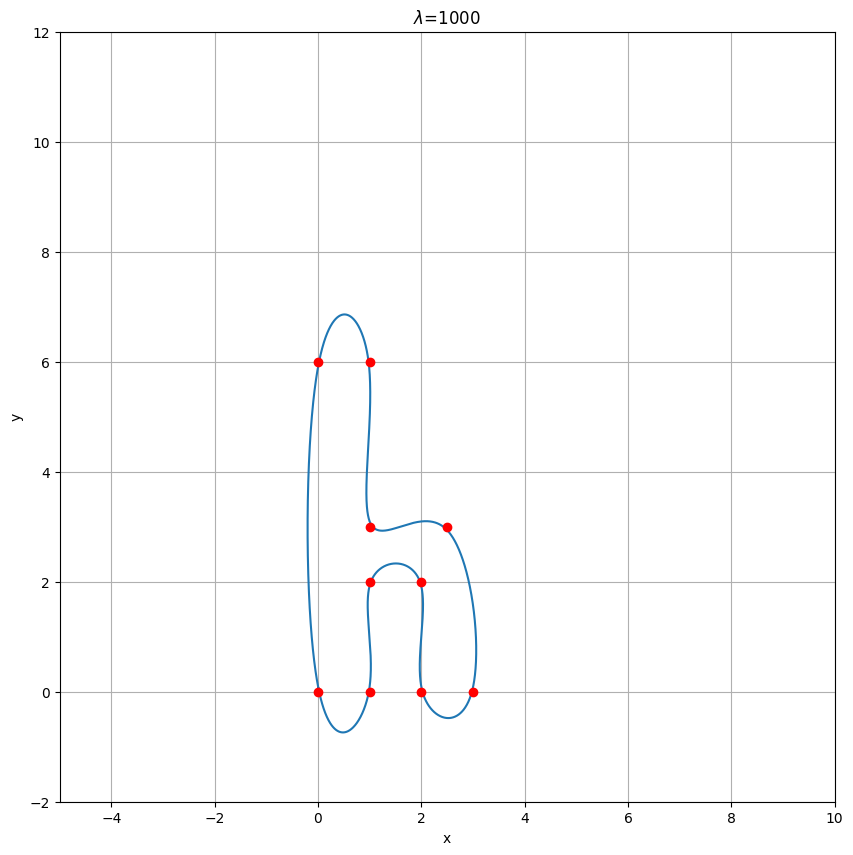

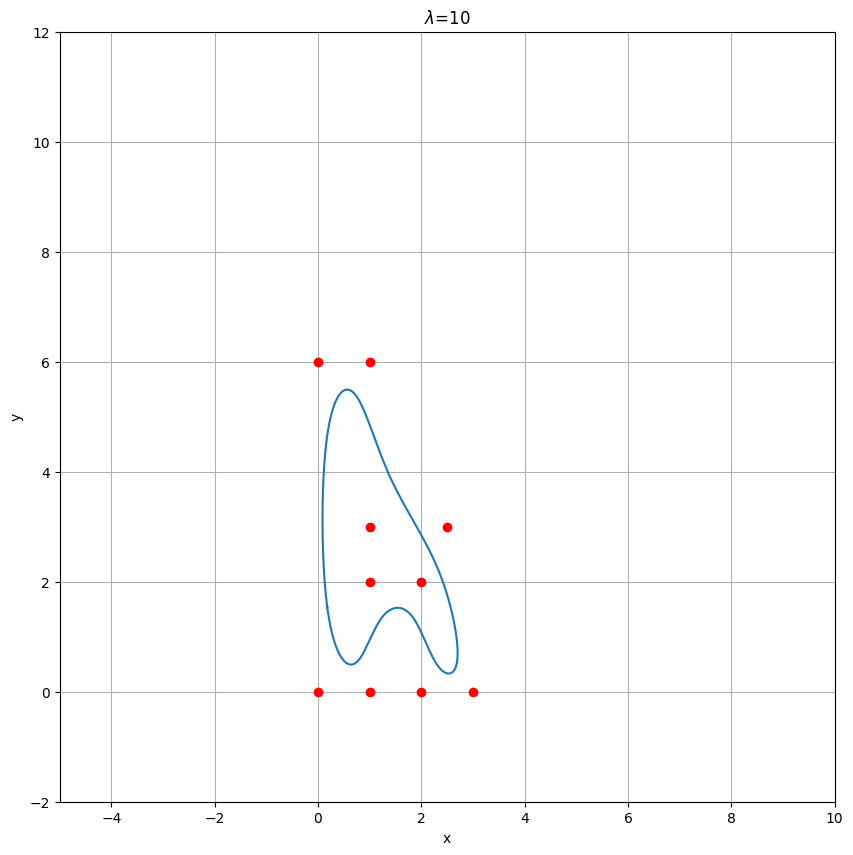

In [ ]:
A = np.array([[0,0],[0,6],[1,6],[1,3],[2.5,3],[3,0], [2,0],[2,2], [1,2], [1,0]]) #h
V = np.array([[0,1],[1,0],[1,0.5],[2,2],[2,0],[-1,0],[0,1],[-1,1],[0,-1],[-1,0]])

d = np.copy(A)

Lambda = 1000
P_start = np.zeros((2*len(d),2))
# Set the initial of P
for i in range(len(P_start)//2):
    P_start[2*i] = d[i]
    P_start[2*i+1] = d[i] + V[i]/3

P = gradient_descent(gradient_G,P_start,Lambda,d)
P_new = find_control_points(P)

M = 200
t = np.linspace(0,len(P_new),len(P_new)*M)
B = composite_Bezier(P_new,t)
plt.plot(B[:,0],B[:,1])
plt.xlim(-5,10)
plt.ylim(-2,12)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("$\lambda$="+str(Lambda))

#plot the datapoints
for x,y in d:
    plt.plot(x,y,'o',color="red")
plt.show()

Lambda = 10
P_start = np.zeros((2*len(d),2))
P = gradient_descent(gradient_G,P_start,Lambda,d)
P_new = find_control_points(P)

M = 200
t = np.linspace(0,len(P_new),len(P_new)*M)
B = composite_Bezier(P_new,t)
plt.plot(B[:,0],B[:,1])
plt.title("$\lambda$="+str(Lambda))
plt.xlim(-5,10)
plt.ylim(-2,12)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
# plot the datapoints
for x,y in d:
    plt.plot(x,y,'o',color="red")
plt.show()

Above, the two different optimisations are plotted, with the data points marked as well.

The figure we get from using this method with $\lambda = 1000$, removes the sharp corners we got earlier in task 3. The curve appears to be quite close to the data points. This corresponds well to our earlier intuiton, as a large $\lambda$ will weight interpolation more than minimising acceleration.

When we use $\lambda = 10$, we lose a lot of detail and it is no longer recognizable as the letter 'h'. The minimised letter has more straight lines, and becomes more of a triangle. We can also notice that it does not interpolate the data points. This is because, as discussed in the previous task, a small $\lambda$ means that minimising the curve's squared acceleration has priority over interpolating the data points.




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=47e2e0a8-1ab4-4862-bb7d-94b107e96d87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>